# <p style="font-family: Arial; font-size:2em;color:darkorange;"> Semestrální práce </p>
### <p style="font-family: Arial; font-size:1.4em;color:midnightblue;"> Analýza dat: Požáry Brazilských lesů </p>
<p style="font-family: Arial; 1em; color:c;"> V semestrální práci se zabývám analýzou dat, která sleduje požáry v Brazilských pralesech. Data sledují situaci od roku 1998 až do roku 2016 skrz celý rok. </p>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
df = pd.read_csv('amazon.csv',encoding="ISO-8859-1")
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


In [3]:
months_portugese=list(pd.unique(df['month']))
months_english=['January','February','March','April','May','June','July','August','September','October','November','December']
dict_month=dict(zip(months_portugese,months_english))
dict_month

{'Janeiro': 'January',
 'Fevereiro': 'February',
 'Março': 'March',
 'Abril': 'April',
 'Maio': 'May',
 'Junho': 'June',
 'Julho': 'July',
 'Agosto': 'August',
 'Setembro': 'September',
 'Outubro': 'October',
 'Novembro': 'November',
 'Dezembro': 'December'}

In [4]:
df.month=df['month'].map(dict_month)
df

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01
5,2003,Acre,January,10.0,2003-01-01
6,2004,Acre,January,0.0,2004-01-01
7,2005,Acre,January,12.0,2005-01-01
8,2006,Acre,January,4.0,2006-01-01
9,2007,Acre,January,0.0,2007-01-01


In [5]:
df.head(19)

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01
5,2003,Acre,January,10.0,2003-01-01
6,2004,Acre,January,0.0,2004-01-01
7,2005,Acre,January,12.0,2005-01-01
8,2006,Acre,January,4.0,2006-01-01
9,2007,Acre,January,0.0,2007-01-01


#### <p style="font-family: Arial; font-size:2em;color:olivedrab;"> Vypíšeme data, která máme v jednotlivých sloupcích.  </p>

In [6]:
years = df["year"].unique()
years

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [7]:
year_info = df[df["year"] == years[5]]
year_info.head(10)

,year,state,month,number,date
5,2003,Acre,January,10.000,2003-01-01
25,2003,Acre,February,0.000,2003-01-01
45,2003,Acre,March,0.000,2003-01-01
65,2003,Acre,April,1.000,2003-01-01
85,2003,Acre,May,6.000,2003-01-01
105,2003,Acre,June,0.000,2003-01-01
125,2003,Acre,July,168.000,2003-01-01
145,2003,Acre,August,1.976,2003-01-01
165,2003,Acre,September,3.942,2003-01-01
185,2003,Acre,October,740.000,2003-01-01


In [8]:
states = year_info['state'].unique()
states

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [9]:
print("month : ", df['month'].unique())

month :  ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


In [10]:
for col in df[['year', 'state', 'month']]:
    print('Unikátní hodnoty ve sloupci: %s' %col)
    print(df[col].unique())
    print('\n')

print('Počet unikátních hodnot: ')
print(df[['year', 'state', 'month']].nunique())

Unikátní hodnoty ve sloupci: year
[1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017]


Unikátní hodnoty ve sloupci: state
['Acre' 'Alagoas' 'Amapa' 'Amazonas' 'Bahia' 'Ceara' 'Distrito Federal'
 'Espirito Santo' 'Goias' 'Maranhao' 'Mato Grosso' 'Minas Gerais' 'Pará'
 'Paraiba' 'Pernambuco' 'Piau' 'Rio' 'Rondonia' 'Roraima' 'Santa Catarina'
 'Sao Paulo' 'Sergipe' 'Tocantins']


Unikátní hodnoty ve sloupci: month
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


Počet unikátních hodnot: 
year     20
state    23
month    12
dtype: int64


#### <p style="font-family: Arial; font-size:2em;color:goldenrod;"> Vizualizace dat  </p>
Nejprve jsou vypsány součty požárů za jednotlivé roky a v jednotlivých státech.
Grafy ukazují počty požárů v jednotlivých státech.

In [11]:
# Kolik požárů bylo za 19 let nahlášeno
print('Počet nahlášených požárů za 19 let:',df['number'].sum())


Počet nahlášených požárů za 19 let: 698924.073


In [12]:
# Tabulka požárů pro každý rok
tabulka1 = pd.pivot_table(df,values="number",index=["year"],aggfunc=np.sum)
tabulka1

,number
year,
1998,20013.971
1999,26882.821
2000,27351.251
2001,29071.612
2002,37390.600
2003,42760.674
2004,38453.163
2005,35004.965
2006,33832.161


(array([15000., 20000., 25000., 30000., 35000., 40000., 45000.]),
 <a list of 7 Text yticklabel objects>)

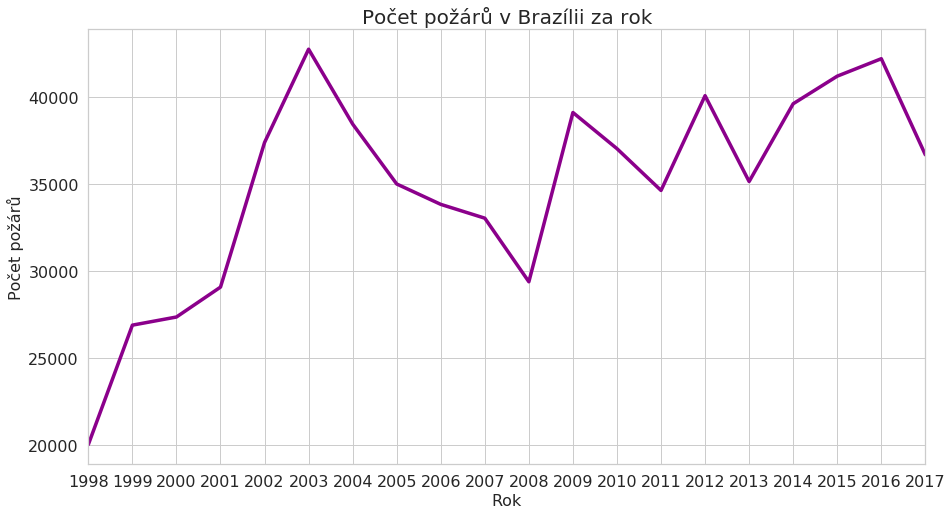

In [13]:
# Vizualizace počty požárů za rok
data1 = pd.DataFrame(df.groupby('year')['number'].sum().reset_index())

plt.figure(figsize=(15,8))
sns.set(style="whitegrid")
sns.lineplot(x='year', y='number', data=data1, color='darkmagenta', lw=3.5)
plt.xlabel('Rok', fontsize=16)
plt.ylabel('Počet požárů', fontsize=16)
plt.title('Počet požárů v Brazílii za rok', fontsize=20)
plt.xlim(1998,2017)
plt.xticks(np.arange(1998, 2018, 1),fontsize=16)
plt.yticks(fontsize=16)

In [14]:
fires_by_month = df.groupby(['month']).sum()['number']

In [15]:
# Rozdělení měsíců

months = df['month'].unique()
fires_by_month = fires_by_month.reindex(months)
fires_by_month

month
January      47747.844
February     30848.050
March        30717.405
April        28188.770
May          34731.363
June         56010.675
July         92326.113
August       88050.435
September    58578.305
October      88681.579
November     85508.054
December     57535.480
Name: number, dtype: float64

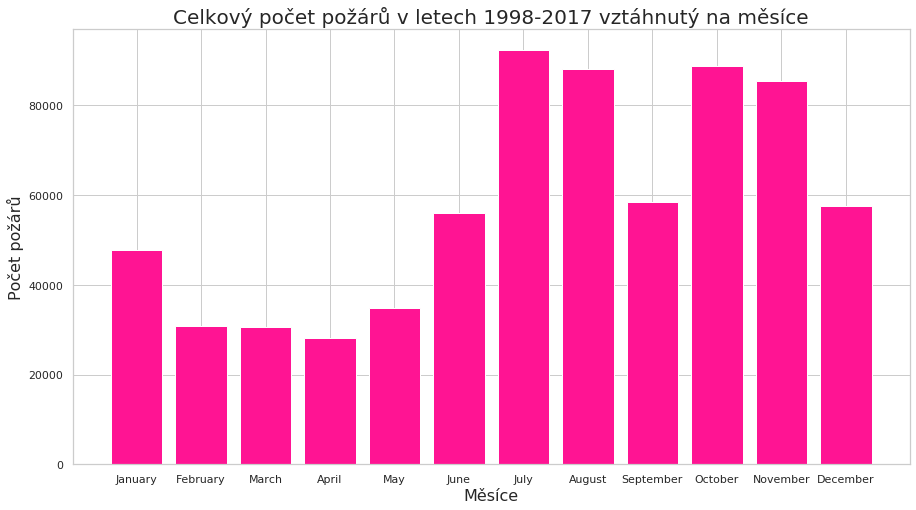

In [16]:
plt.rc('figure', figsize=(15,8))
plt.bar(months, fires_by_month, color='deeppink')
plt.title('Celkový počet požárů v letech 1998-2017 vztáhnutý na měsíce', fontsize=20)
plt.xlabel('Měsíce', fontsize=16)
plt.ylabel('Počet požárů', fontsize=16)
plt.show()

In [17]:
# Tabulka požárů pro každý stát
table = pd.pivot_table(df,values="number",index=["state"],aggfunc=np.sum)
table

,number
state,
Acre,18464.030
Alagoas,4644.000
Amapa,21831.576
Amazonas,30650.129
Bahia,44746.226
Ceara,30428.063
Distrito Federal,3561.000
Espirito Santo,6546.000
Goias,37695.520


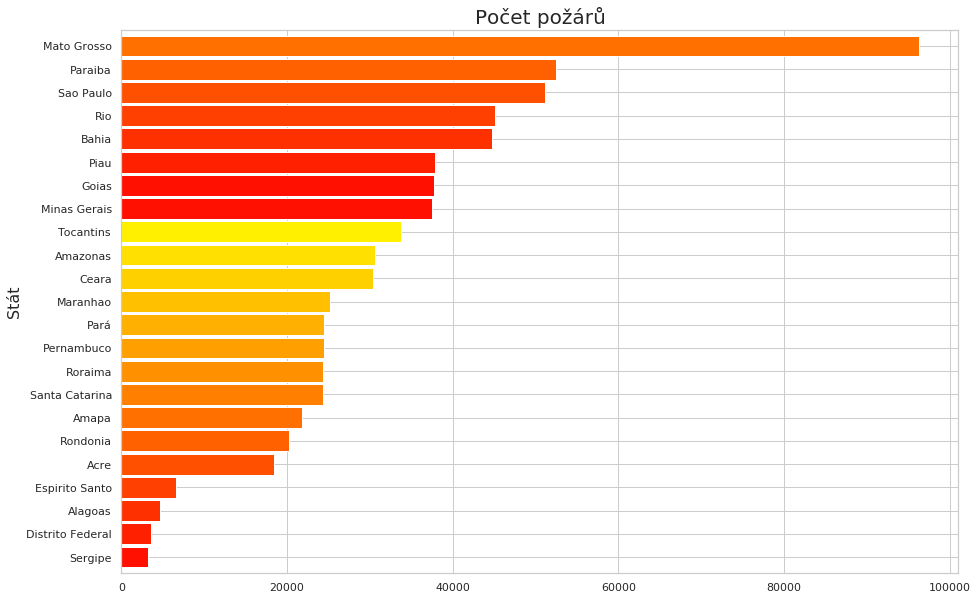

In [18]:
# Druhá vizualizace požáry podle států

plt.figure(figsize = (15,10))
df[['state','number']].groupby(['state']).number.sum().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('autumn',15))
plt.ylabel("Stát", fontsize=16)
plt.title('Počet požárů', fontsize=20)

plt.show()

In [19]:
df.loc[df.year == 2003]

,year,state,month,number,date
5,2003,Acre,January,10.000,2003-01-01
25,2003,Acre,February,0.000,2003-01-01
45,2003,Acre,March,0.000,2003-01-01
65,2003,Acre,April,1.000,2003-01-01
85,2003,Acre,May,6.000,2003-01-01
105,2003,Acre,June,0.000,2003-01-01
125,2003,Acre,July,168.000,2003-01-01
145,2003,Acre,August,1.976,2003-01-01
165,2003,Acre,September,3.942,2003-01-01
185,2003,Acre,October,740.000,2003-01-01


In [20]:
year_info = df[df["year"] == years[5]]
year_info.head(10)

,year,state,month,number,date
5,2003,Acre,January,10.000,2003-01-01
25,2003,Acre,February,0.000,2003-01-01
45,2003,Acre,March,0.000,2003-01-01
65,2003,Acre,April,1.000,2003-01-01
85,2003,Acre,May,6.000,2003-01-01
105,2003,Acre,June,0.000,2003-01-01
125,2003,Acre,July,168.000,2003-01-01
145,2003,Acre,August,1.976,2003-01-01
165,2003,Acre,September,3.942,2003-01-01
185,2003,Acre,October,740.000,2003-01-01


In [21]:
single_year_state = []

for state in states:
  state_name = state
  count_fire = year_info[year_info['state'] == state].number.sum()
  obj = {"state":state_name, "count_fire":count_fire}
  single_year_state.append(obj)
single_year_state

[{'state': 'Acre', 'count_fire': 946.918},
 {'state': 'Alagoas', 'count_fire': 299.0},
 {'state': 'Amapa', 'count_fire': 1652.0},
 {'state': 'Amazonas', 'count_fire': 1524.268},
 {'state': 'Bahia', 'count_fire': 3076.1499999999996},
 {'state': 'Ceara', 'count_fire': 795.524},
 {'state': 'Distrito Federal', 'count_fire': 96.0},
 {'state': 'Espirito Santo', 'count_fire': 708.0},
 {'state': 'Goias', 'count_fire': 2078.8450000000003},
 {'state': 'Maranhao', 'count_fire': 962.442},
 {'state': 'Mato Grosso', 'count_fire': 6939.854},
 {'state': 'Minas Gerais', 'count_fire': 1824.437},
 {'state': 'Pará', 'count_fire': 1073.058},
 {'state': 'Paraiba', 'count_fire': 2796.5699999999997},
 {'state': 'Pernambuco', 'count_fire': 2431.0},
 {'state': 'Piau', 'count_fire': 1963.979},
 {'state': 'Rio', 'count_fire': 3438.419},
 {'state': 'Rondonia', 'count_fire': 1464.9119999999998},
 {'state': 'Roraima', 'count_fire': 1789.1309999999999},
 {'state': 'Santa Catarina', 'count_fire': 1608.852},
 {'state':

In [22]:
year_state_df = pd.DataFrame(single_year_state)
year_state_df

,count_fire,state
0,946.918,Acre
1,299.000,Alagoas
2,1652.000,Amapa
3,1524.268,Amazonas
4,3076.150,Bahia
5,795.524,Ceara
6,96.000,Distrito Federal
7,708.000,Espirito Santo
8,2078.845,Goias
9,962.442,Maranhao


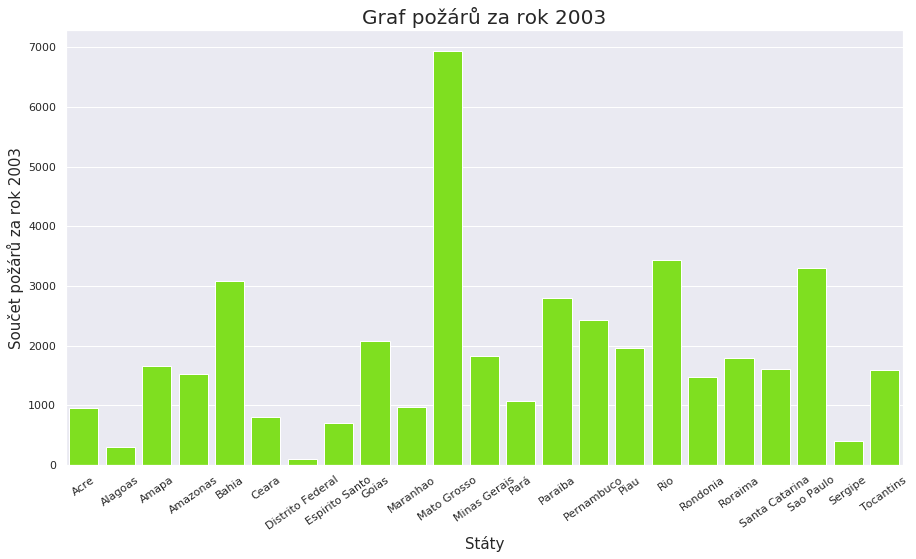

In [23]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
ax = sns.barplot(x="state",y="count_fire",data=year_state_df, color="chartreuse")
ax.set_xticklabels(ax.get_xticklabels(), rotation=35 )
plt.xlabel("Státy", fontsize=15)
plt.ylabel("Součet požárů za rok 2003", fontsize=15)
plt.title("Graf požárů za rok 2003", fontsize=20)
plt.show()

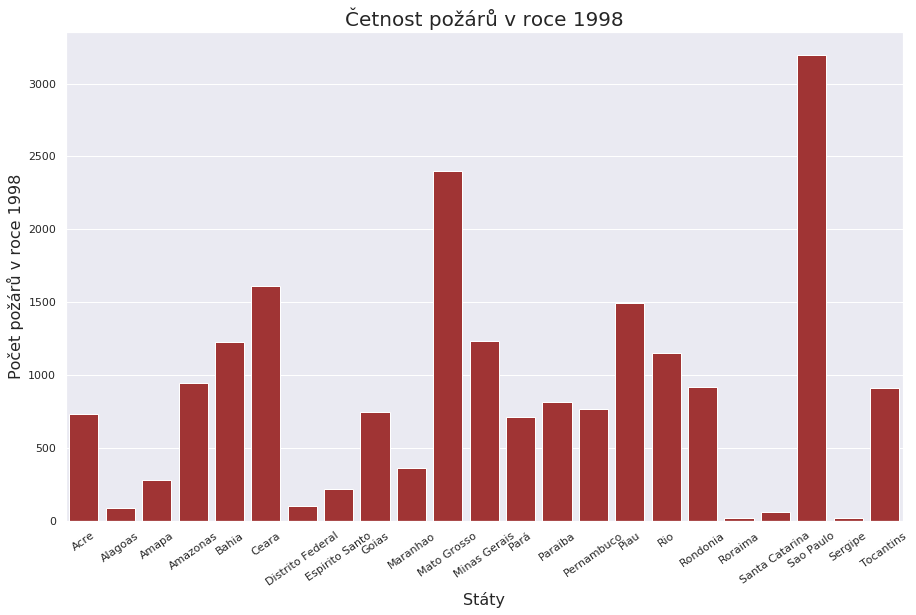

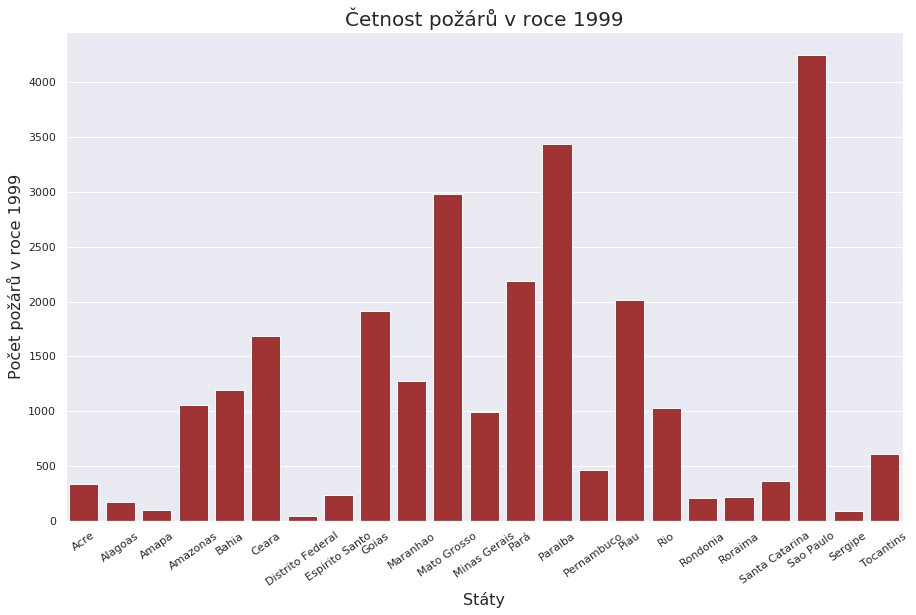

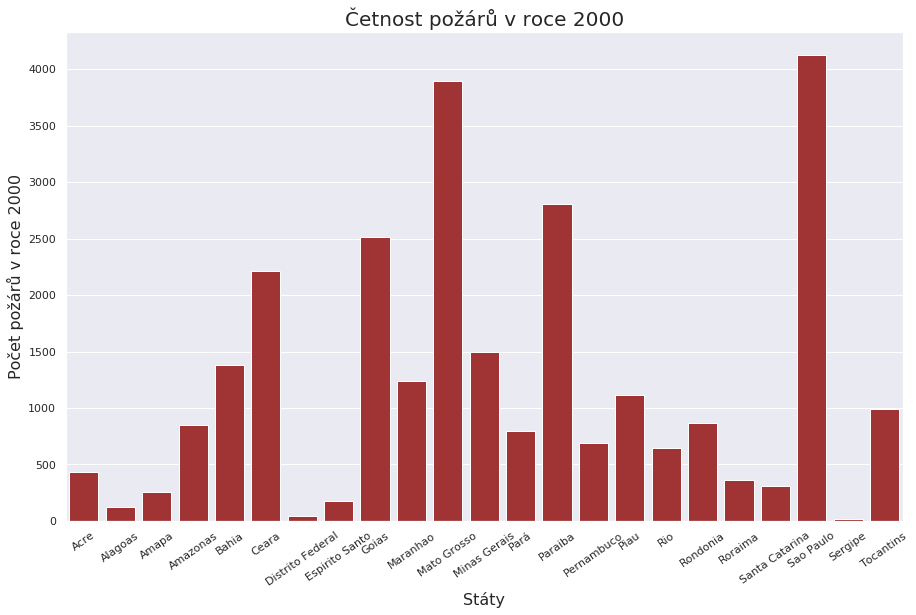

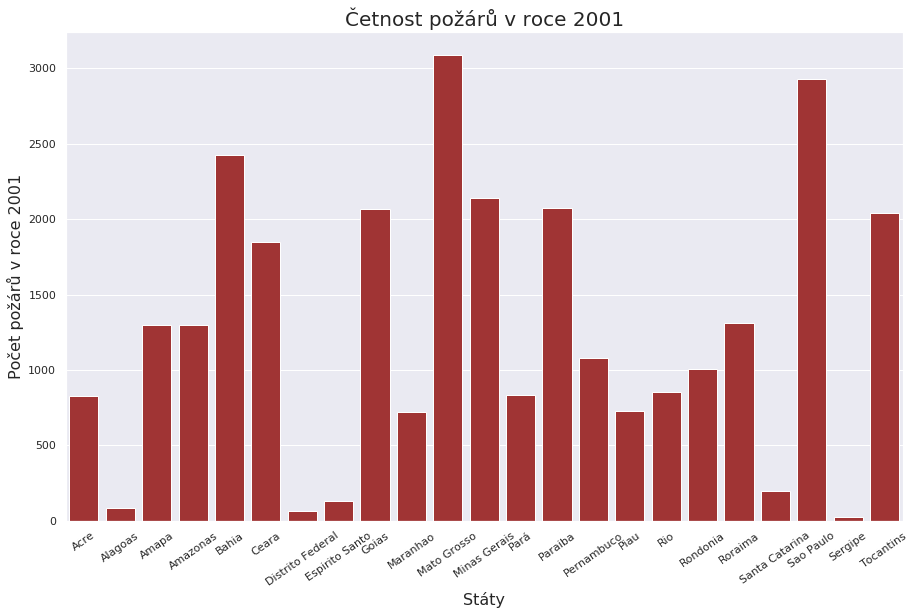

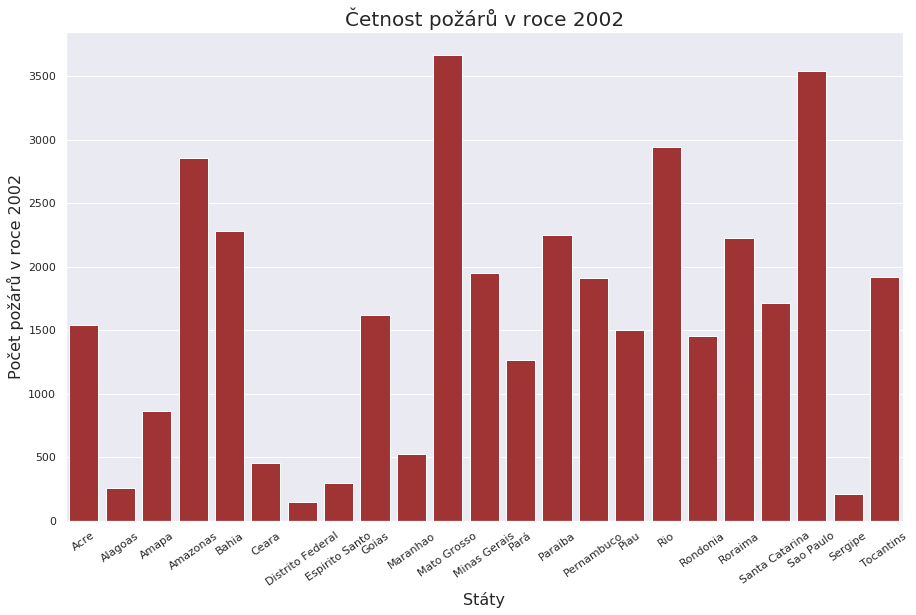

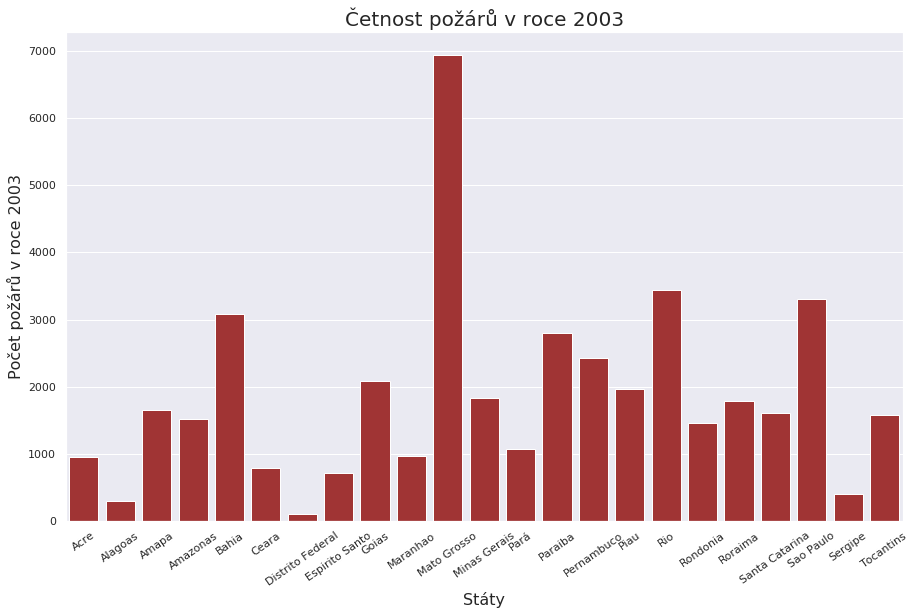

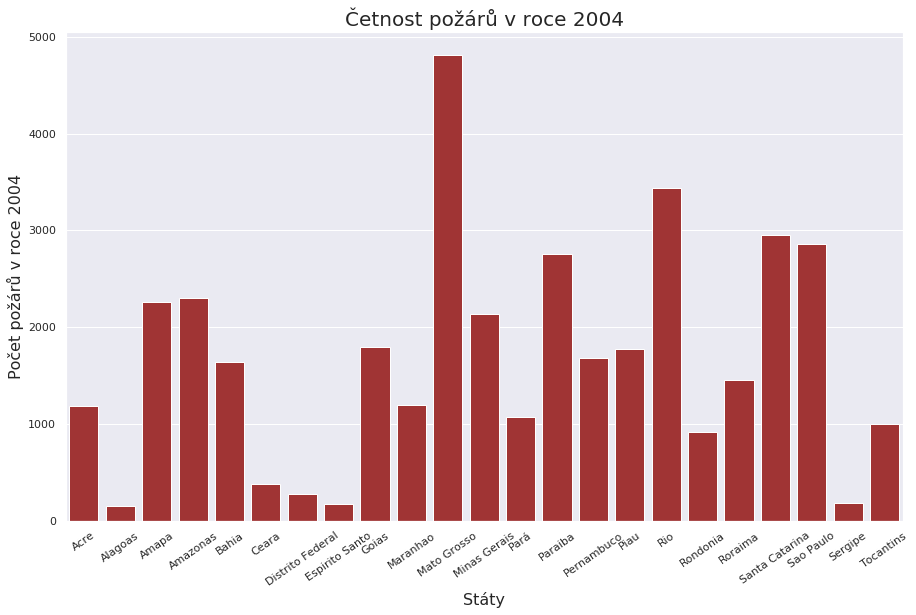

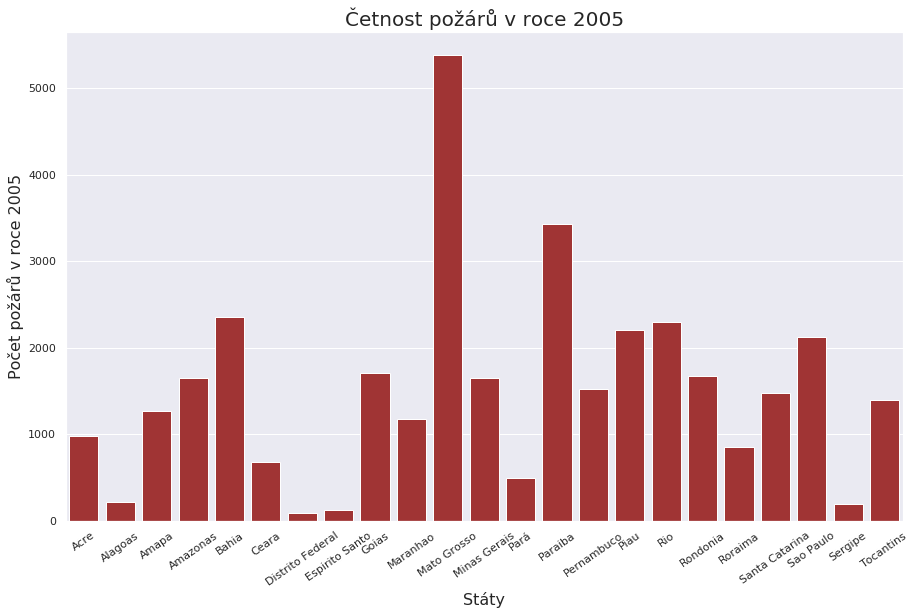

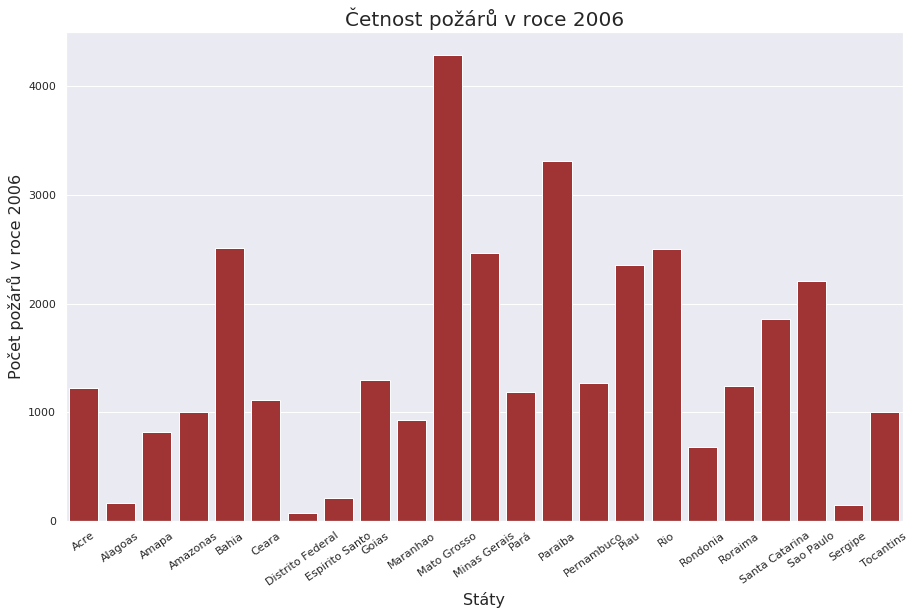

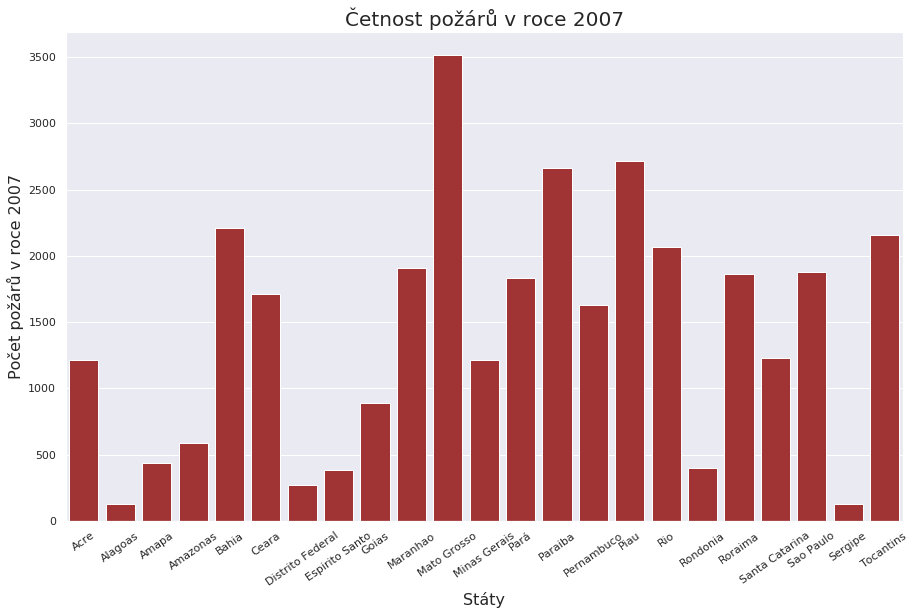

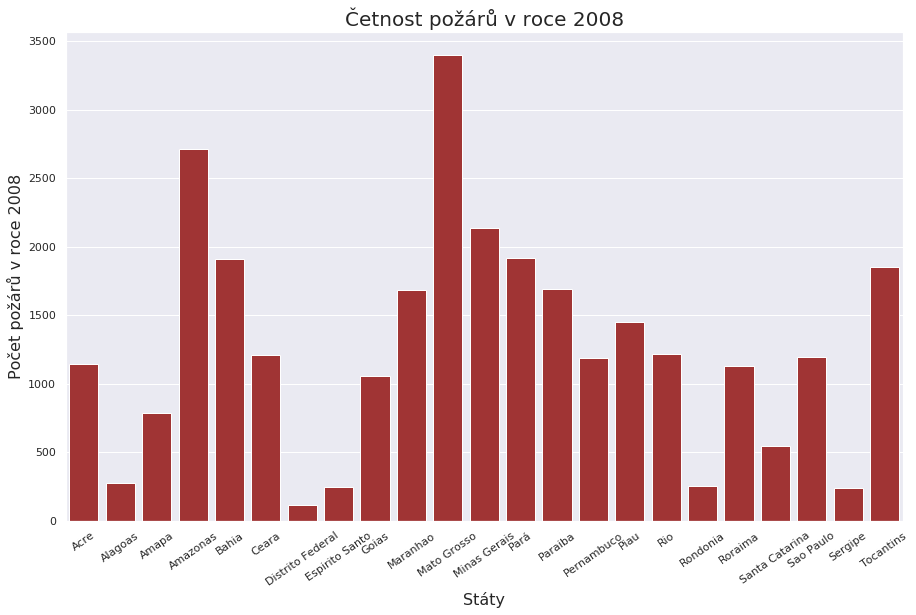

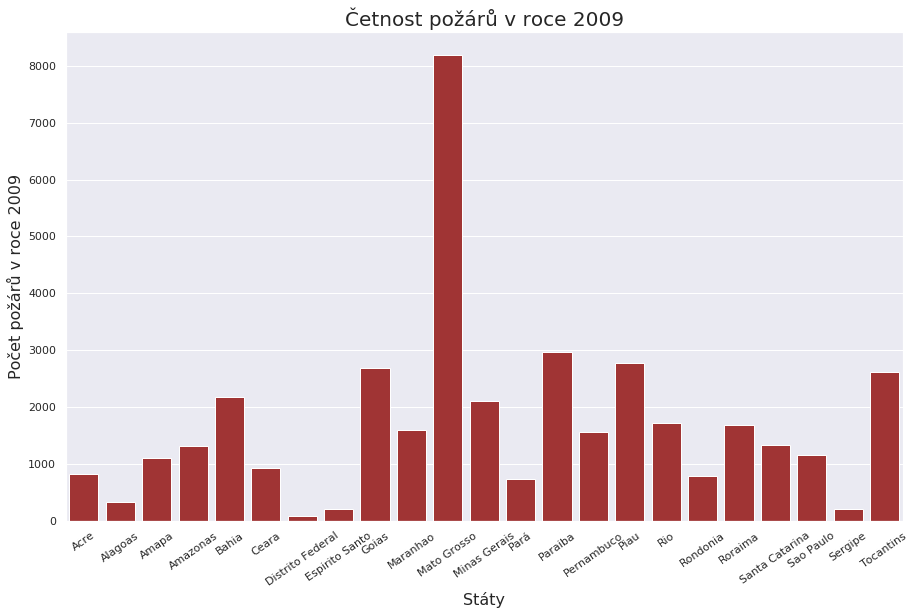

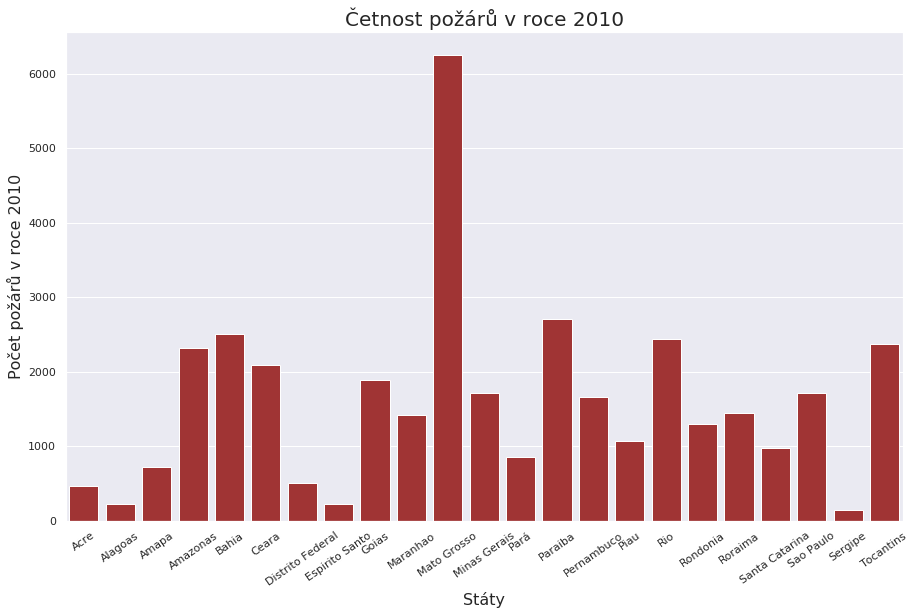

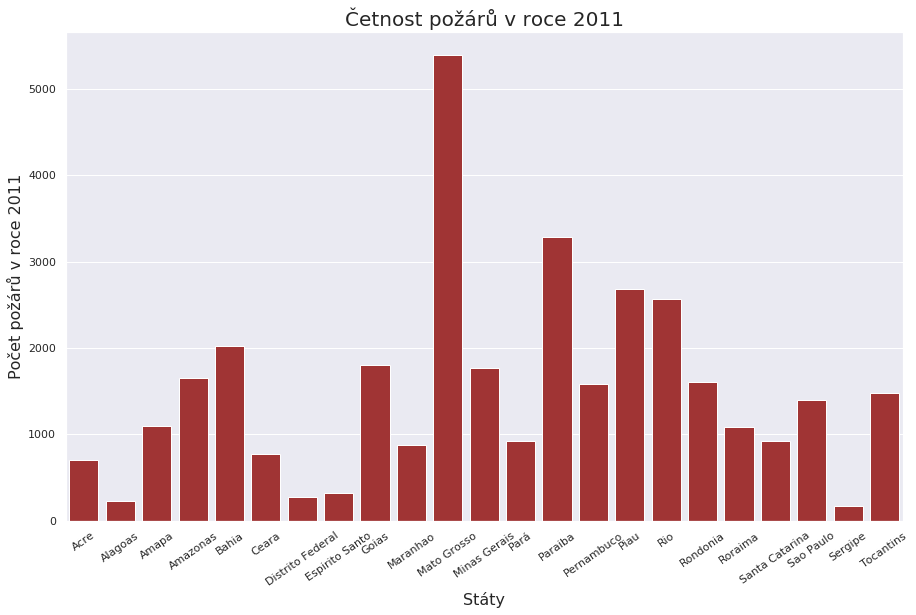

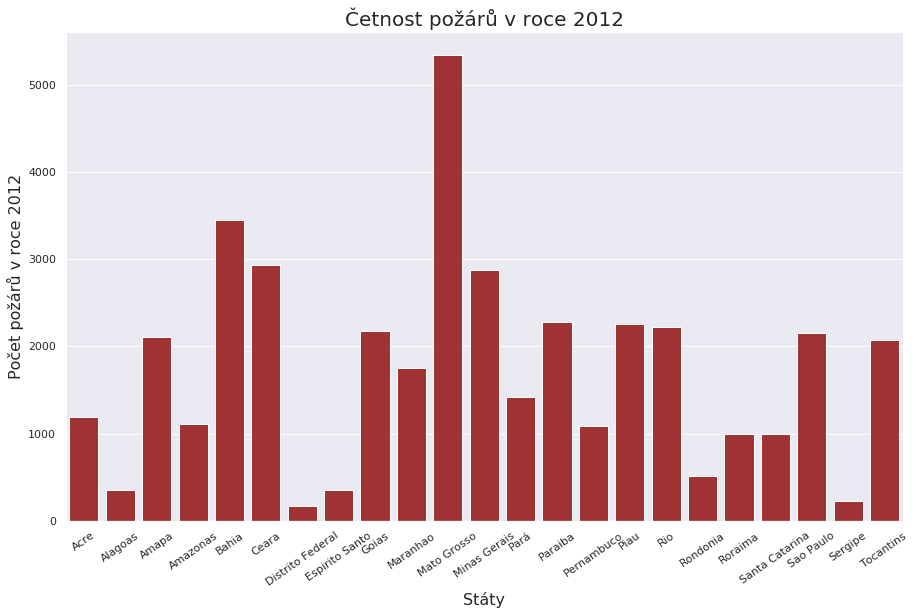

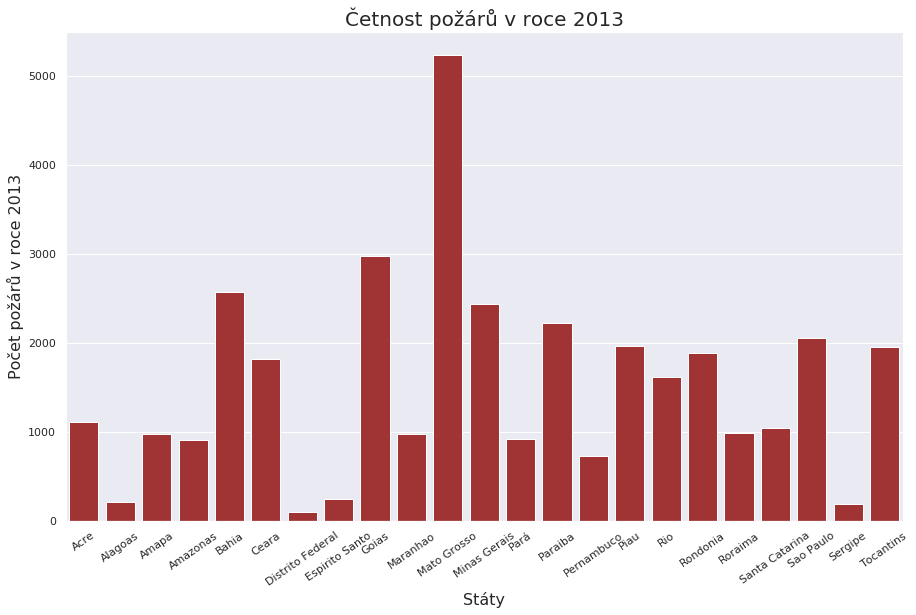

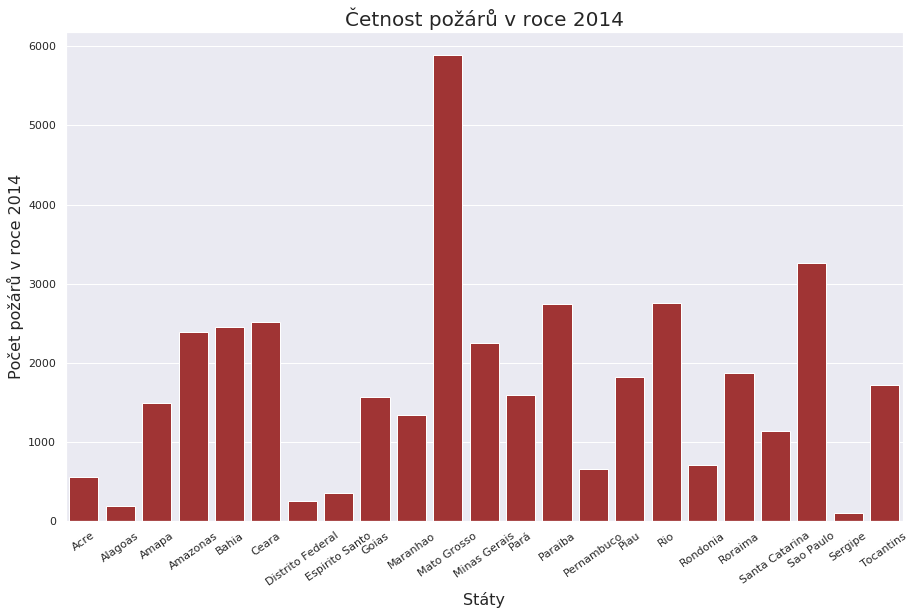

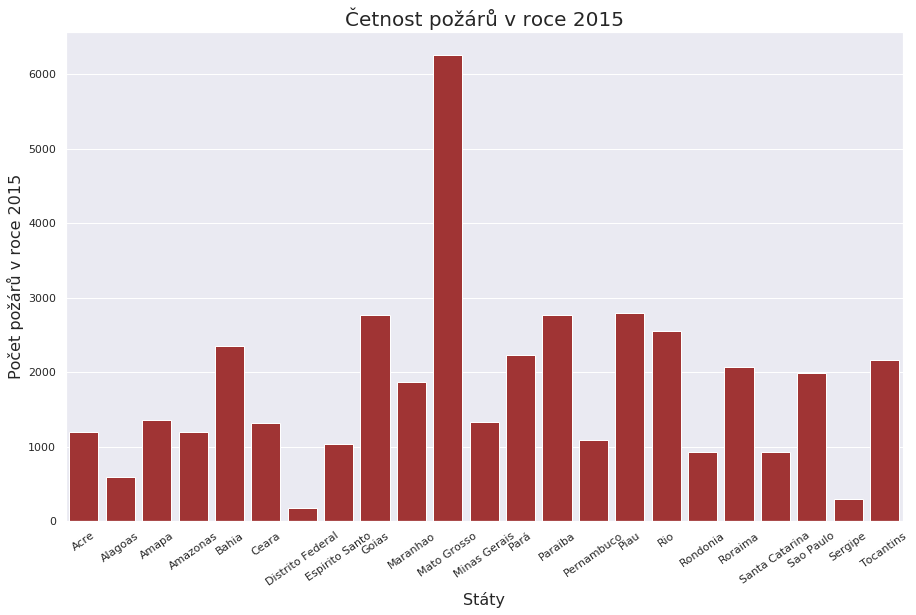

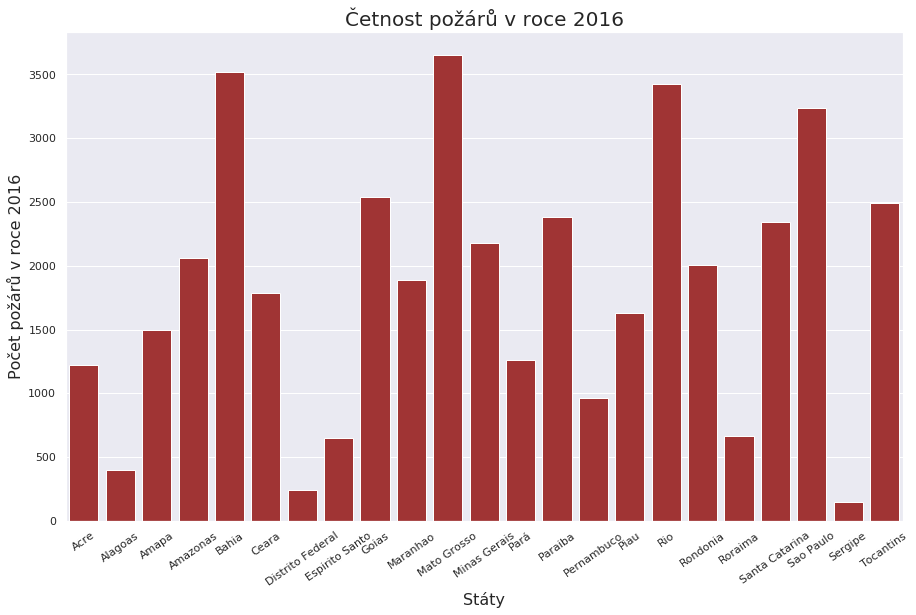

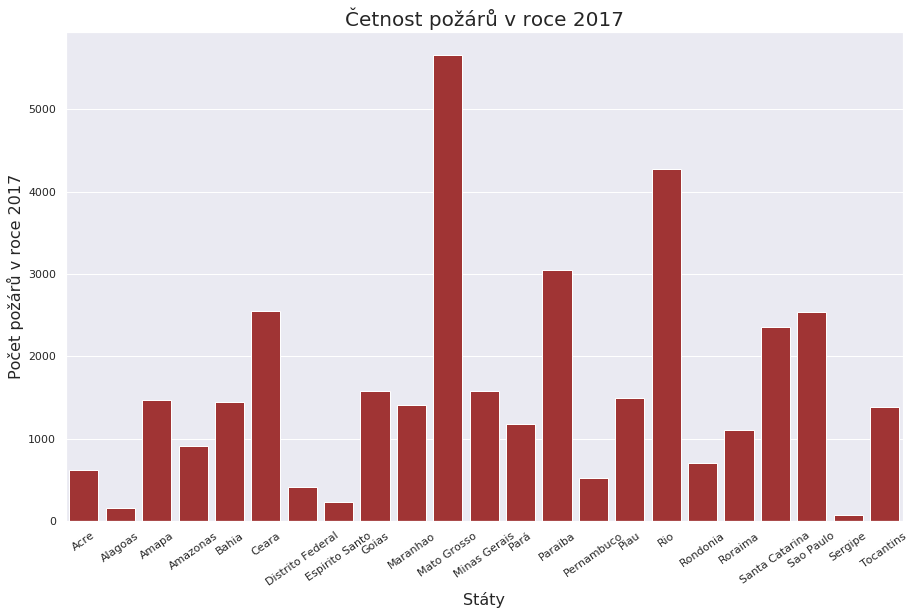

In [24]:
for year in years:
  year_info = df[df["year"] == year]
  states = year_info['state'].unique()

  single_year_state = []

  for state in states:
    state_name = state
    count_fire = year_info[year_info['state'] == state].number.sum()
    obj = {"state":state_name, "count_fire":count_fire}
    single_year_state.append(obj)

  year_state_df = pd.DataFrame(single_year_state)

  plt.figure(figsize=(15,9))
  sns.set(style="darkgrid")
  ax = sns.barplot(x="state",y="count_fire",data=year_state_df, color="firebrick")
  ax.set_xticklabels(ax.get_xticklabels(), rotation=35)
  plt.xlabel("Státy", fontsize=16)
  plt.ylabel("Počet požárů v roce {0}".format(year), fontsize=16)
  plt.title("Četnost požárů v roce {0}".format(year), fontsize=20)
  plt.show()

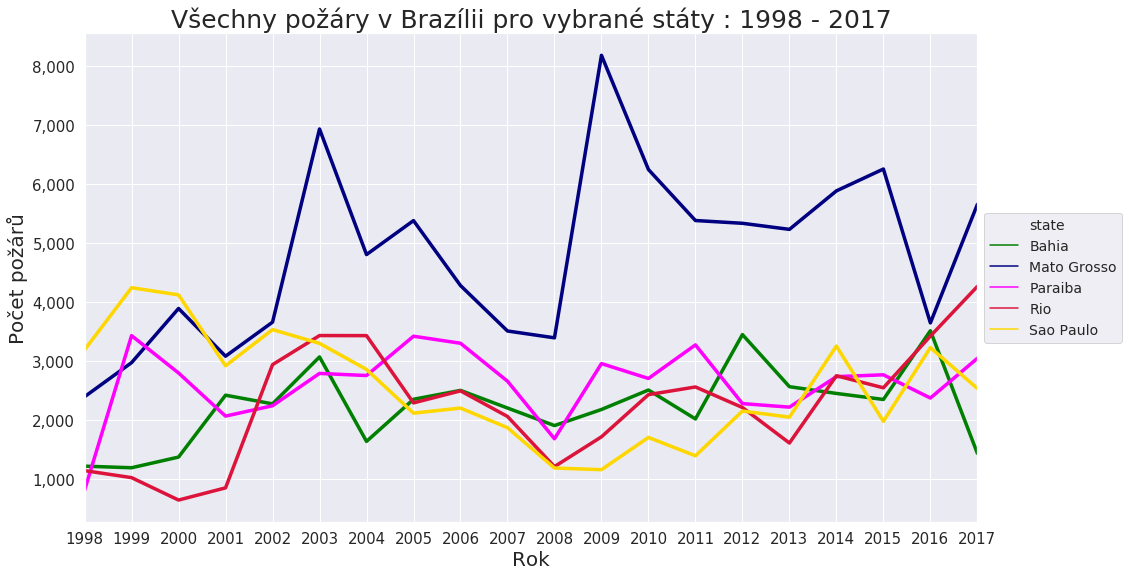

In [25]:
# Příprava dat
top_states_most_fires = df[df['state'].isin(['Bahia','Mato Grosso','Paraiba','Sao Paulo','Rio'])].groupby(by = ['year','state', 'month']).sum().reset_index()

# Graf
plt.figure(figsize=(16,9))
ax = sns.lineplot(x = 'year', y = 'number', data = top_states_most_fires, hue = 'state', estimator = 'sum', lw = 3.5, 
                  err_style = None, palette = ["green", "navy", "magenta", "crimson", "gold"])

# Dodělání popisků
plt.title('Všechny požáry v Brazílii pro vybrané státy : 1998 - 2017', fontsize = 25)
plt.xlabel('Rok', fontsize = 20)
plt.ylabel('Počet požárů', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

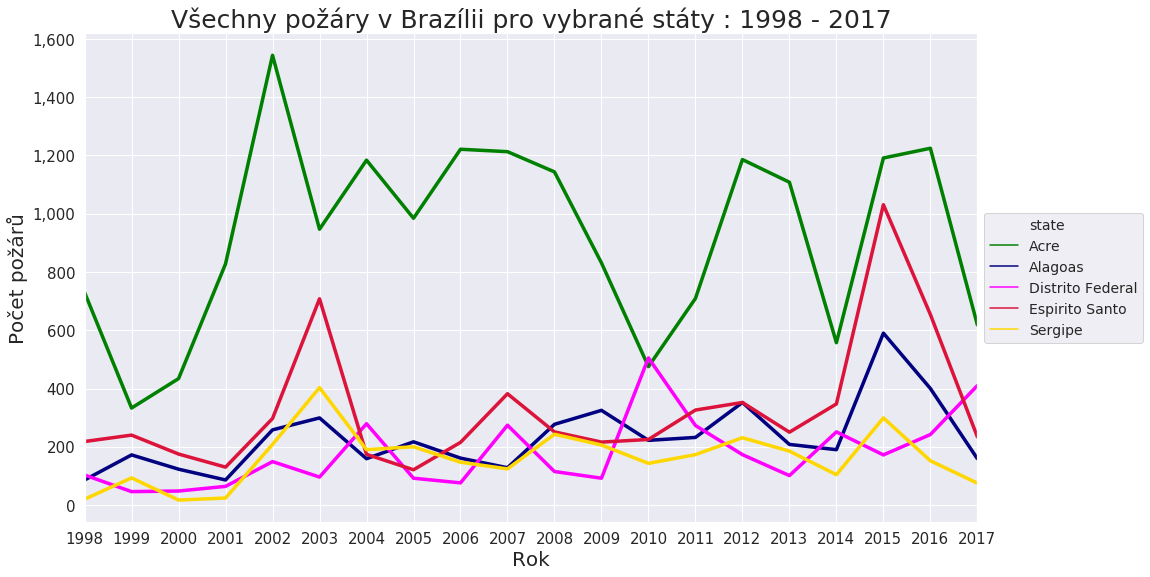

In [26]:
# Příprava dat
top_states_least_fires = df[df['state'].isin(['Sergipe','Distrito Federal','Alagoas','Espirito Santo','Acre'])].groupby(by = ['year','state', 'month']).sum().reset_index()

# Graf
plt.figure(figsize=(16,9))
ax = sns.lineplot(x = 'year', y = 'number', data = top_states_least_fires, hue = 'state', estimator = 'sum', lw = 3.5, 
                  err_style = None, palette = ["green", "navy", "magenta", "crimson", "gold"])

# Dodělání popisků
plt.title('Všechny požáry v Brazílii pro vybrané státy : 1998 - 2017', fontsize = 25)
plt.xlabel('Rok', fontsize = 20)
plt.ylabel('Počet požárů', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})